# K-Nearest Neighbors Algorithm


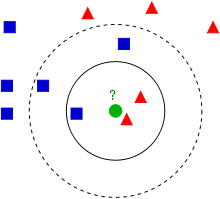In this Jupyter Notebook we will focus on $KNN-Algorithm$. KNN is a data classification algorithm that attempts to determine what group a data point is in by looking at the data points around it.

An algorithm, looking at one point on a grid, trying to determine if a point is in group A or B, looks at the states of the points that are near it. The range is arbitrarily determined, but the point is to take a sample of the data. If the majority of the points are in group A, then it is likely that the data point in question will be A rather than B, and vice versa.
<br>

<img src="knn/example 1.png"  height="30%" width="30%">


# Imports

In [163]:
import numpy as np
from math import *
import tqdm
from collections import Counter

# How it works?

We have some labeled data set $X-train$, and a new set $X$ that we want to classify based on previous classifications



## Seps

### 1. Calculate distance to all neighbours
### 2. Sort neightbours (based on closest distance)
### 3. Count possibilities of each class for k nearest neighbours 
### 4. The class with highest possibilty is Your prediction

# 1. Calculate distance to all neighbours

Depending on the problem You should use different type of count distance method.
<br>
For example we can use Euclidean distance. Euclidean distance is the "ordinary" straight-line distance between two points in D-Dimensional space

#### Definiton
$d(p, q) = d(q, p) = \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2 + \dots + (q_D - p_D)^2} = \sum_{d=1}^{D} (p_d - q_d)^2$

#### Example
Distance in $R^2$
<img src="knn/euklidean_example.png"  height="30%" width="30%">


$p = (4,6)$
<br>
$q = (1,2)$
<br>
$d(p, q) = \sqrt{(1-4)^2 + (2-6)^2} =\sqrt{9 + 16} = \sqrt{25} = 5 $



## Code

In [164]:
def get_euclidean_distance(A, B): 
    C = np.zeros([A.shape[0], B.shape[0]])
    for i in range(A.shape[0]):
        for j in range(B.shape[0]):
            C[i][j] = sqrt(np.sum((A[i] - B[j]) ** 2))
    return C

## Example Usage

In [165]:
X = np.array([[1,2,3] , [-4,5,-6]])

X_train = np.array([[0,0,0], [1,2,3], [4,5,6], [-4, 4, -6]])

print("X: {} Exaples in {} Dimensional space".format(*X.shape))
print("X_train: {} Exaples in {} Dimensional space".format(*X_train.shape))

print("X:")
print(X)

print("X_train:")
print(X_train)


X: 2 Exaples in 3 Dimensional space
X_train: 4 Exaples in 3 Dimensional space
X:
[[ 1  2  3]
 [-4  5 -6]]
X_train:
[[ 0  0  0]
 [ 1  2  3]
 [ 4  5  6]
 [-4  4 -6]]


In [166]:
## Initialize the distance matrix using the get_euclidean_matrix
distance = get_euclidean_distance(X, X_train)
## Print Distance between nth example from X and mth from X_train = distance[n - 1][m - 1]
print("Distance between first example from X and first example form X_train:", distance[0][0])

Distance between first example from X and first example form X_train: 3.7416573867739413


# 2. Sort neightbours

In order to find best fitting class for our observations we need to find to which classes belong observation neightbours and then to sort classes based on the closest distance


## Code

In [167]:
def get_sorted_train_labels(distance_matrix, y):
    arranged_label = np.zeros([distance_matrix.shape[0], distance_matrix.shape[1]])
    for i in range(distance_matrix.shape[0]):
        row = []
        for j in range(distance_matrix.shape[1]):
            row.append([distance_matrix[i][j], y[j]])
        row.sort()
        for j in range(distance_matrix.shape[1]):
            arranged_label[i][j] = row[j][1]
    return arranged_label

    """
    Function sorts y labels, based on probabilities from distances matrix
    Args:
        distance_matrix (numpy.ndarray): Distance Matrix, between points from X and X_train, size: N1:N2
        y (numpy.ndarray): vector of classes of X points, size: N1

    Returns:
        numpy.ndarray: labels matrix sorted according to distances to nearest neightours, size N1:N2 

    """


# 3. Count possibilities of each class for k nearest neighbours 

In order to find best class for our observation $x$ we need to calculate the probability of belonging to each class. In our case it is quite easy. We need just to count how many from k-nearest-neighbours of observation $x$ belong to each class and then devide it by k 
<br><br>
$p(y=class \space| x)  = \frac{\sum_{1}^{k}(1 \space if \space N_i = class, \space else \space 0) }{k}$ Where $N_i$ is $i$ nearest neightbour



## Code

In [168]:
def get_p_y_x_using_knn(y, k):

    probabilities_matrix = []
    for i in y:
        d = {}
        for j in range(k):
            if i[j] in d.keys():
                d[i[j]] += 1/k
            else:
                d[i[j]] = 1/k
        probabilities_matrix.append(d)

    return probabilities_matrix

    """
    The function determines the probability distribution p (y | x)
    for each of the labels for objects from the X
    using the KNN classification learned on the X_train

    Args:
        y (numpy.ndarray): Sorted matrix of N2 nearest neighbours labels, size N1:N2
        k (int): number of nearest neighbours for KNN algorithm

    Returns: numpy.ndarray: Matrix of probabilities for N1 points (from set X) of belonging to each class,
    size N1:C (where C is number of classes)
    """

# 4. The class with highest possibilty is Your prediction

At the end we combine all previous steps to get prediction

## Code

In [169]:
def predict(X, X_train, y_train, k, distance_function):

    predictions = []
    distance_matrix = distance_function(X,X_train)
    probability = get_p_y_x_using_knn(get_sorted_train_labels(distance_matrix, y_train), k)

    for i in probability:
        predictions.append(max(zip(i.values(), i.keys()))[1])
    
    return np.array(predictions)
    
    """
    Function returns predictions for new set X based on labels of points from X_train
    Args:
        X (numpy.ndarray): set of observations (points) that we want to label
        X_train (numpy.ndarray): set of lalabeld bservations (points)
        y_train (numpy.ndarray): labels for X_train
        k (int): number of nearest neighbours for KNN algorithm

    Returns:
        (numpy.ndarray): label predictions for points from set X
    """

# Accuracy

To find how good our knn model works we should count accuracy

## Code

In [170]:
def count_accuracy(prediction, y_true):

    accuracy = np.sum(prediction == y_true) / len(prediction)
    return accuracy

    """
    Returns:
        float: Predictions accuracy

    """

## Example usage

In [171]:
y_true = np.array([0, 2])

prediction = predict(X, X_train, [2, 0, 0, 2], 3, get_euclidean_distance)
print(prediction)

print("True classes:{}, accuracy {}%".format(y_true, count_accuracy(prediction, y_true)  * 100))

[0. 2.]
True classes:[0 2], accuracy 100.0%


# Find best k

Best k parameter is that one for which we have highest accuracy

## Code

In [172]:
def select_knn_model(X_validation, y_validation, X_train, y_train, k_values, distance_function):
    """
    Function returns k parameter that best fit Xval points
    Args:
        Xval (numpy.ndarray): set of Validation Data, size N1:D
        Xtrain (numpy.ndarray): set of Training Data, size N2:D
        yval (numpy.ndarray): set of labels for Validation data, size N1:1
        ytrain (numpy.ndarray): set of labels for Training Data, size N2:1
        k_values (list): list of int values of k parameter that should be checked

    Returns:
        int: k paprameter that best fit validation set
    """

    accuracies = []

    for k in tqdm.notebook.tqdm(k_values):
        prediction = predict(X_validation, X_train, y_train, k, distance_function)

        accuracy = count_accuracy(prediction, y_validation)
        accuracies.append(accuracy)

    best_k = k_values[accuracies.index(max(accuracies))]

    return best_k, accuracies


# Real World Example - Iris Dataset


<img src="knn/iris_example1.jpeg"  height="60%" width="60%">


This is perhaps the best known database to be found in the pattern recognition literature. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

Each example contains 4 attributes
1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 

Predicted attribute: class of iris plant. 

<img src="knn/iris_example2.png"  height="70%" width="70%">






In [173]:
from sklearn import datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()

iris_X = iris.data
iris_y = iris.target

print("Iris: {} examples in {} dimensional space".format(*iris_X.shape))
print("First example in dataset :\n Speal lenght: {}cm \n Speal width: {}cm \n Petal length: {}cm \n Petal width: {}cm".format(*iris_X[0]))

print("Avalible classes", np.unique(iris_y))

Iris: 150 examples in 4 dimensional space
First example in dataset :
 Speal lenght: 5.1cm 
 Speal width: 3.5cm 
 Petal length: 1.4cm 
 Petal width: 0.2cm
Avalible classes [0 1 2]


## Prepare Data

In our data set we have 150 examples (50 examples of each class), we have to divide it into 3 datasets.
1. Training data set, 90 examples. It will be used to find  k - nearest neightbours
2. Validation data set, 30 examples. It will be used to find best k parameter, the one for which accuracy is highest
3. Test data set, 30 examples. It will be used to check how good our model performs

Data has to be shuffled (mixed in random order), because originally it is stored 50 examples of class 0, 50 of 1 and 50 of 2.


In [174]:
from sklearn.utils import shuffle

iris_X, iris_y = shuffle(iris_X, iris_y, random_state=134)


test_size = 30
validation_size = 30
training_size = 90

X_test = iris_X[:test_size]
X_validation = iris_X[test_size:(test_size + validation_size)]
X_train = iris_X[(test_size + validation_size):]
y_test = iris_y[:test_size]
y_validation = iris_y[test_size:(test_size + validation_size)]
y_train = iris_y[(test_size + validation_size):]

## Find best k parameter

  0%|          | 0/47 [00:00<?, ?it/s]

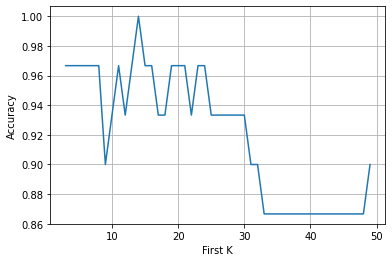

In [175]:
k_values = [i for i in range(3,50)]

best_k, accuracies = select_knn_model(X_validation, y_validation, X_train, y_train, k_values, distance_function=get_euclidean_distance)

plt.plot(k_values,accuracies)
plt.xlabel("First K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

## Count accuracy for training set

In [176]:
prediction = predict(X_test, X_train, y_train, best_k, get_euclidean_distance)

## Calculate Best accuracy using the best k value
print("Accuracy for first best k = ", best_k, "is", round(count_accuracy(prediction,y_test) * 100, 2), "%")

Accuracy for first best k =  14 is 93.33 %


# Sources

https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm - first visualisation image

https://en.wikipedia.org/wiki/Euclidean_distance - euclidean distance visualisation

https://rajritvikblog.wordpress.com/2017/06/29/iris-dataset-analysis-python/ - first iris image

https://rpubs.com/wjholst/322258 - second iris image

